## 2 - SELEÇÃO DE VARIÁVEIS

In [34]:
# Importar bibliotecas

import pandas as pd
import numpy as np
#pd.set_option('display.precision',2) # casas decimais 

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',1000)
#pd.reset_option('^display.',silent=True) # Reseta todas as configurações anteriores
from sklearn.feature_selection import VarianceThreshold
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_constant_features
import os
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_classif, chi2

from sklearn.preprocessing import StandardScaler

In [35]:
# Importar a base tratada

df = pd.read_csv('base_limpa.csv')

In [36]:
df.shape

(71179, 153)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71179 entries, 0 to 71178
Columns: 153 entries, TARGET to inf_qtd_zeros
dtypes: float64(47), int64(106)
memory usage: 83.1 MB


In [38]:
# Variáveis binárias #36

var_b = [i for i,j in enumerate(df.nunique()) if j == 2]
df_b = df.iloc[:,var_b]
df[df_b.columns] = df_b[df_b.columns].astype('int32')

In [39]:
# Variáveis numéricas #

var_num = [i for i,j in enumerate(df.nunique()) if j >=331]
df_n = df.iloc[:,var_num]
df[df_n.columns] = df_n[df_n.columns].astype('float64')

In [40]:
binarias_lista = df_b.columns.to_list() 

In [41]:
numerica_lista = df_n.columns.to_list() 

In [42]:
df_categorica  = df.drop(columns = numerica_lista+binarias_lista)

In [43]:
# Variáveis categóricas

df[df_categorica.columns] = df_categorica[df_categorica.columns].astype('int64')

In [44]:
# Ajuste pontual de tipo de variável
df['var3'] = df['var3'].astype('float64')
df['var15'] = df['var15'].astype('float64')
df['var21'] = df['var21'].astype('float64')
df['delta_imp_aport_var13_1y3'] = df['delta_imp_aport_var13_1y3'].astype('float64')
df['delta_num_aport_var13_1y3'] = df['delta_num_aport_var13_1y3'].astype('float64')
df['inf_qtd_zeros'] = df['inf_qtd_zeros'].astype('float64')
df['saldo_var13_largo'] = df['saldo_var13_largo'].astype('float64')

 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71179 entries, 0 to 71178
Columns: 153 entries, TARGET to inf_qtd_zeros
dtypes: float64(48), int32(37), int64(68)
memory usage: 73.0 MB


In [46]:
#Variáveis rotuladas

#Binária - int32: 36 (incluindo a Target) 
#Categórica - int64: 67
#Numérica - float64: 46

#36+69+44 = 149 variáveis

In [47]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71179 entries, 0 to 71178
Columns: 153 entries, TARGET to inf_qtd_zeros
dtypes: float64(48), int32(37), int64(68)
memory usage: 73.0 MB


In [48]:
# Para o caso da entrada categórica e saída categórica (modelo de Classificação) utilizados o Chi-quadrado

#Variáveis categóricas
df_cat = df.select_dtypes(include=['int32','int64'])

# Prepara o dataset
X = df_cat.drop(columns=['TARGET'])
y = df_cat['TARGET']

#Divisão em dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=8888,stratify=y)



In [49]:
df_cat.columns.to_list()

['TARGET',
 'ind_var1_0',
 'ind_var5_0',
 'ind_var5',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13',
 'ind_var14_0',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var26',
 'ind_var25_0',
 'ind_var25',
 'ind_var30',
 'ind_var37_cte',
 'ind_var37_0',
 'ind_var37',
 'ind_var39_0',
 'ind_var40_0',
 'ind_var41_0',
 'num_var1_0',
 'num_var4',
 'num_var5_0',
 'num_var5',
 'num_var8_0',
 'num_var8',
 'num_var12_0',
 'num_var12',
 'num_var13_0',
 'num_var13_corto_0',
 'num_var13_corto',
 'num_var13_largo_0',
 'num_var13_largo',
 'num_var13',
 'num_var14_0',
 'num_var24_0',
 'num_var24',
 'num_var26_0',
 'num_var26',
 'num_var25_0',
 'num_var25',
 'num_op_var41_hace2',
 'num_op_var41_hace3',
 'num_op_var41_ult1',
 'num_op_var41_ult3',
 'num_op_var39_hace2',
 'num_op_var39_hace3',
 'num_op_var39_ult1',
 'num_op_var39_ult3',
 'num_va

In [50]:
fs = SelectKBest(score_func=chi2, k ='all')
selecionados = fs.fit_transform(X_train, y_train)
selecionados.shape

(56943, 104)

In [51]:
# Colocando resultados em dataframe para plotagem
resultados_cat = pd.DataFrame({'Colunas':X.columns,
                           'F_Scores':fs.scores_,
                           'p-Values':np.round(fs.pvalues_,3)}).sort_values(by='F_Scores', ascending=False)
resultados_cat

,Colunas,F_Scores,p-Values
69,var36,34061.968791,0.000
59,num_var30,1163.496593,0.000
68,num_var42,980.627272,0.000
84,num_meses_var5_ult3,976.780476,0.000
32,num_var5,961.832479,0.000
60,num_var35,799.648416,0.000
96,num_op_var39_efect_ult3,462.268271,0.000
94,num_op_var41_efect_ult3,427.296403,0.000
53,num_op_var41_ult3,364.055958,0.000
57,num_op_var39_ult3,356.772586,0.000


In [54]:
#variáveis de entrada numéricas para saída categórica

#Variáveis numéricas
df_num = df.select_dtypes(include=['float64'])

# Prepara o dataset
X = df_num.values
y = df['TARGET']

#Divisão em dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=8888,stratify=y)


In [55]:
df_num.columns.to_list()

['var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'saldo_var5',
 'saldo_var8',
 'saldo_var12',
 'saldo_var13_corto',
 'saldo_var13_largo',
 'saldo_var13',
 'saldo_var24',
 'saldo_var26',
 'saldo_var25',
 'saldo_var30',
 'saldo_var37',
 'saldo_var42',
 'delta_imp_aport_var13_1y3',
 'delta_num_aport_var13_1y3',
 'imp_aport_var13_hace3',
 'imp_var43_emit_ult1',
 'imp_trans_var37_ult1',
 'var21',
 'saldo_medio_var5_hace2',
 'saldo_medio_var5_hace3',
 'saldo_medio_var5_ult1',
 'saldo_medio_var5_ult3',
 'saldo_medio_var8_hace2',
 'saldo_medio_var8_ult1',
 'saldo_medio_var8_ult3',
 'saldo_medio_var12_hace2',
 'saldo_medio_var12_hace3',
 'saldo_medio_var12_ult1',
 'saldo_medio_var12_ult3',
 'saldo_medio_var13_corto_hace2',
 'saldo_medio_

In [56]:
# Seleciona melhores variáveis com f_classif = ANOVA variáveis de entrada numéricas para saída categórica
fs_num = SelectKBest(score_func=f_classif, k='all')
selecionados_num = fs_num.fit_transform(X_train, y_train)
selecionados_num.shape

(56943, 48)

In [57]:
# Resultados
resultados_num = pd.DataFrame({'Colunas':df_num.columns,
                           'F_Scores':fs_num.scores_,
                           'p-Values':np.round(fs_num.pvalues_,3)}).sort_values(by='F_Scores', ascending=False)
resultados_num

,Colunas,F_Scores,p-Values
1,var15,512.867947,0.000
47,inf_qtd_zeros,289.020208,0.000
22,saldo_var30,83.816085,0.000
18,saldo_var13,52.837866,0.000
10,imp_op_var39_efect_ult1,48.179557,0.000
7,imp_op_var41_efect_ult1,45.265900,0.000
16,saldo_var13_corto,40.728293,0.000
44,saldo_medio_var13_corto_ult1,40.176381,0.000
45,saldo_medio_var13_corto_ult3,37.587214,0.000
24,saldo_var42,37.128985,0.000


### Análise de correlação



In [58]:
correlacao = df.corr()

In [59]:
correlacao

,TARGET,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var1_0,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13,ind_var14_0,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var30,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var41_0,num_var1_0,num_var4,num_var5_0,num_var5,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13,num_var14_0,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var30_0,num_var30,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var41_0,num_var42_0,num_var42,saldo_var5,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13,saldo_var24,saldo_var26,saldo_var25,saldo_var30,saldo_var37,saldo_var42,var36,delta_imp_aport_var13_1y3,delta_num_aport_var13_1y3,imp_aport_var13_hace3,imp_var43_emit_ult1,imp_trans_var37_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_meses_var39_vig_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38,inf_qtd_zeros
TARGET,1.000000,-0.010916,0.097580,-0.000012,0.010742,0.003665,0.010462,0.004019,0.030503,0.022234,0.028575,0.031436,0.022943,0.028399,0.001674,-0.034118,-0.133351,0.048344,0.028915,-0.039541,-0.035418,-0.040852,-0.035525,-0.035629,-0.019871,-0.019678,-0.040997,-0.020722,-0.031346,-0.033255,0.024178,0.019782,0.024373,0.019782,0.020187,0.020187,-0.150107,0.002604,0.003341,0.003341,-0.036287,0.001755,-0.035302,0.002270,-0.078492,-0.029915,-0.132027,0.048299,0.028915,-0.026512,-0.035266,-0.039371,-0.035420,-0.035622,-0.018311,-0.018286,-0.039738,-0.003718,-0.031321,-0.033246,0.018796,0.018796,0.019381,0.019381,0.007913,-0.001227,0.011676,0.010870,0.007463,-0.001389,0.011681,0.010673,-0.035081,-0.137921,-0.075166,-0.000013,0.001712,0.001712,-0.029766,0.002382,-0.030985,-0.018516,-0.134529,-0.014591,-0.003865,-0.022616,-0.026718,-0.015077,-0.030555,-0.022293,0.005293,0.005275,-0.038377,0.004641,-0.025285,0.102597,-0.008654,-0.008654,-0.021683,-0.004399,-0.011290,0.010741,0.009661,0.007992,0.008917,-0.007066,-0.021881,-0.003837,-0.026928,0.007292,0.010252,-0.002820,0.026167,0.013154,0.016926,0.002193,-0.147607,0.026858,-0.033035,-0.035554,-0.012715,0.005201,0.003685,0.005758,0.004587,0.021806,0.020323,0.022580,0.020983,-0.002426,-0.017071,-0.009633,-0.000934,-0.006427,0.008351,0.001203,-0.020745,-0.016566,-0.016178,-0.019616,-0.005115,-0.003400,-0.003032,-0.018299,-0.012261,-0.021712,-0.021914,-0.023872,-0.014443,-0.026489,-0.025776,-0.020117,0.070074
var3,-0.010916,1.000000,0.124935,0.000

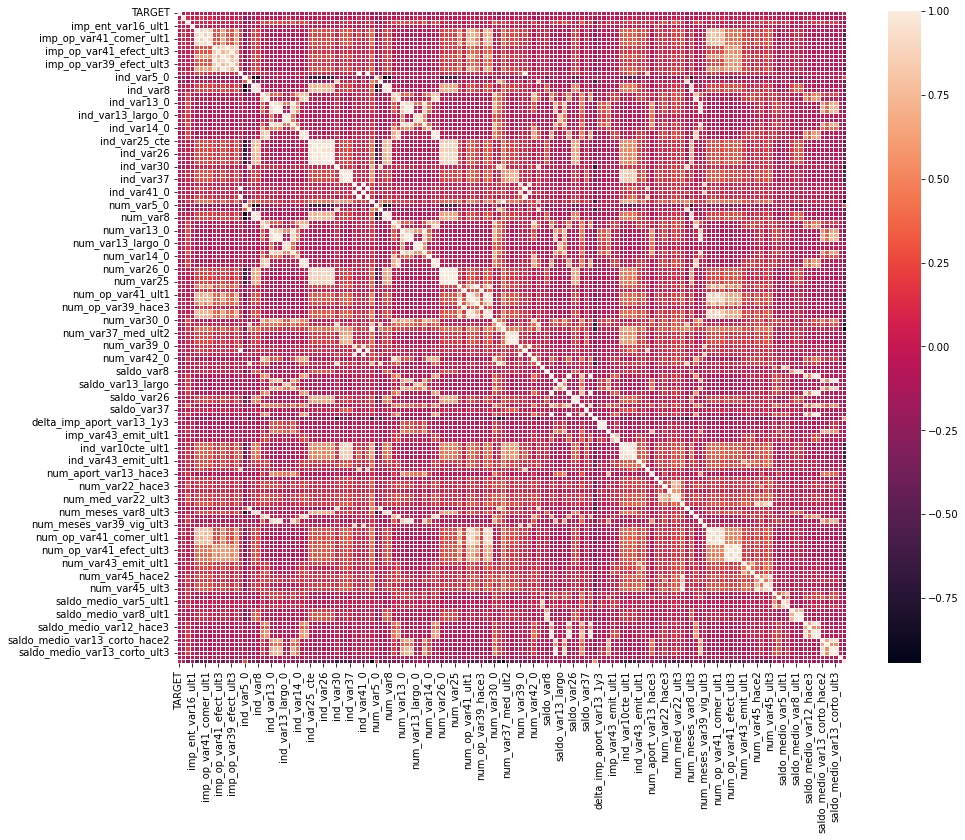

In [60]:
f, ax = plt.subplots(figsize=(15, 12))
# Heat Map
sns.heatmap(correlacao,linewidths=.5, ax=ax);

In [61]:
#0.9 para mais ou para menos indica uma correlação muito forte.
#0.7 a 0.9 positivo ou negativo indica uma correlação forte.
#0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
#0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
#0 a 0.3 positivo ou negativo indica uma correlação desprezível.

#Logo escolhemos 0.5 para threshold

threshold = 0.5
important_corrs = (correlacao[abs(correlacao) > threshold][correlacao != 1.0]) \
    .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

unique_important_corrs = unique_important_corrs.loc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
unique_important_corrs

,attribute pair,correlation
388,"(delta_imp_aport_var13_1y3, delta_num_aport_var13_1y3)",1.000000
750,"(ind_var8, num_var8)",1.000000
114,"(ind_var8_0, num_var8_0)",0.999791
491,"(ind_var13_corto, num_var13_corto)",0.999669
723,"(ind_var24, num_var24)",0.999459
380,"(ind_var40_0, num_var40_0)",0.999419
298,"(imp_op_var39_efect_ult3, imp_op_var41_efect_ult3)",0.999270
265,"(num_op_var39_efect_ult3, num_op_var41_efect_ult3)",0.999242
275,"(num_op_var39_efect_ult1, num_op_var41_efect_ult1)",0.998962
669,"(ind_var1_0, num_var1_0)",0.998848


# JUNTAR AS 10 MELHORES VARIÁVEIS DAS CATEGÓRIAS E NUMÉRICAS 


In [74]:
# Juntar as colunas 

df = df[['TARGET','var36',
'num_var30',
'num_var42',
'num_meses_var5_ult3',
'num_var5',
'num_var35',
'num_op_var39_efect_ult3',
'num_op_var41_efect_ult3',
'num_op_var41_ult3',
'num_op_var39_ult3',
'var15',
'inf_qtd_zeros',
'saldo_var30',
'saldo_var13',
'imp_op_var39_efect_ult1',
'imp_op_var41_efect_ult1',
'saldo_var13_corto',
'saldo_medio_var13_corto_ult1',
'saldo_medio_var13_corto_ult3',
'saldo_var42'
]]

In [75]:
correlacao = df.corr()

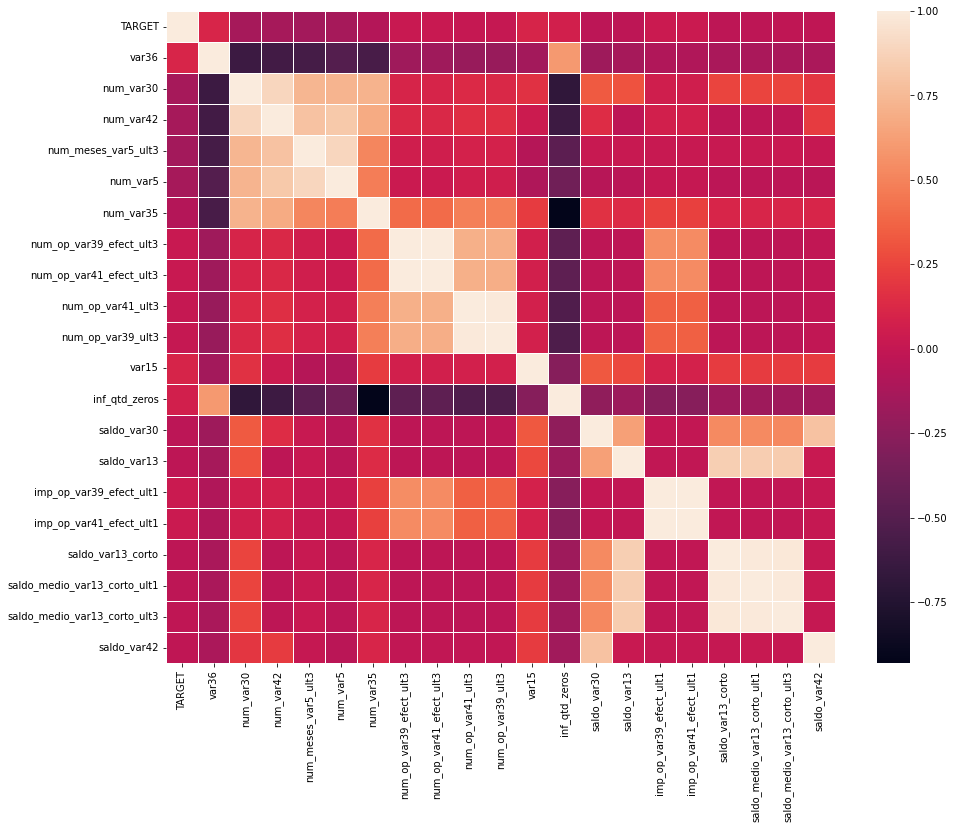

In [76]:
f, ax = plt.subplots(figsize=(15, 12))
# Heat Map
sns.heatmap(correlacao,linewidths=.5, ax=ax);

In [77]:
#0.9 para mais ou para menos indica uma correlação muito forte.
#0.7 a 0.9 positivo ou negativo indica uma correlação forte.
#0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
#0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
#0 a 0.3 positivo ou negativo indica uma correlação desprezível.



threshold = 0.5
important_corrs = (correlacao[abs(correlacao) > threshold][correlacao != 1.0]) \
    .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

unique_important_corrs = unique_important_corrs.loc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
unique_important_corrs

,attribute pair,correlation
8,"(num_op_var39_efect_ult3, num_op_var41_efect_ult3)",0.999242
18,"(imp_op_var39_efect_ult1, imp_op_var41_efect_ult1)",0.998376
31,"(num_op_var39_ult3, num_op_var41_ult3)",0.988805
2,"(saldo_medio_var13_corto_ult1, saldo_var13_corto)",0.988649
27,"(saldo_medio_var13_corto_ult1, saldo_medio_var13_corto_ult3)",0.988355
20,"(saldo_medio_var13_corto_ult3, saldo_var13_corto)",0.980424
29,"(inf_qtd_zeros, num_var35)",-0.931564
33,"(num_meses_var5_ult3, num_var5)",0.894276
0,"(num_var30, num_var42)",0.889036
21,"(saldo_var13, saldo_var13_corto)",0.853291


In [159]:
# Após analisar a correlação e a importância das variáveis nos testes anteriores, chegamos as variáveis finais

In [86]:
var_final = df[['TARGET','var15',
'inf_qtd_zeros',
'saldo_var30',
'saldo_var13',
'imp_op_var39_efect_ult1',
'var36',
'num_var30',
'num_op_var41_efect_ult3',
'num_op_var39_ult3']]

In [87]:
correlacao = var_final.corr()

In [88]:
correlacao

,TARGET,var15,inf_qtd_zeros,saldo_var30,saldo_var13,imp_op_var39_efect_ult1,var36,num_var30,num_op_var41_efect_ult3,num_op_var39_ult3
TARGET,1.000000,0.097580,0.070074,-0.038377,-0.030555,0.031436,0.102597,-0.137921,0.020323,0.010673
var15,0.097580,1.000000,-0.278413,0.326897,0.265630,0.083585,-0.149619,0.167508,0.065096,0.079176
inf_qtd_zeros,0.070074,-0.278413,1.000000,-0.234009,-0.182550,-0.268522,0.594287,-0.682948,-0.458039,-0.532195
saldo_var30,-0.038377,0.326897,-0.234009,1.000000,0.625224,-0.006212,-0.173220,0.332420,-0.028230,-0.032101
saldo_var13,-0.030555,0.265630,-0.182550,0.625224,1.000000,-0.016833,-0.135093,0.304676,-0.031546,-0.037742
imp_op_var39_efect_ult1,0.031436,0.083585,-0.268522,-0.006212,-0.016833,1.000000,-0.093585,0.060294,0.536960,0.355271
var36,0.102597,-0.149619,0.594287,-0.173220,-0.135093,-0.093585,1.000000,-0.623701,-0.167563,-0.194342
num_var30,-0.137921,0.167508,-0.682948,0.332420,0.304676,0.060294,-0.623701,1.000000,0.101173,0.124415
num_op_var41_efect_ult3,0.020323,0.065096,-0.458039,-0.028230,-0.031546,0.536960,-0.167563,0.101173,1.000000,0.693806
num_op_var39_ult3,0.010673,0.079176,-0.532195,-0.032101,-0.037742,0.355271,-0.194342,0.124415,0.693806,1.000000


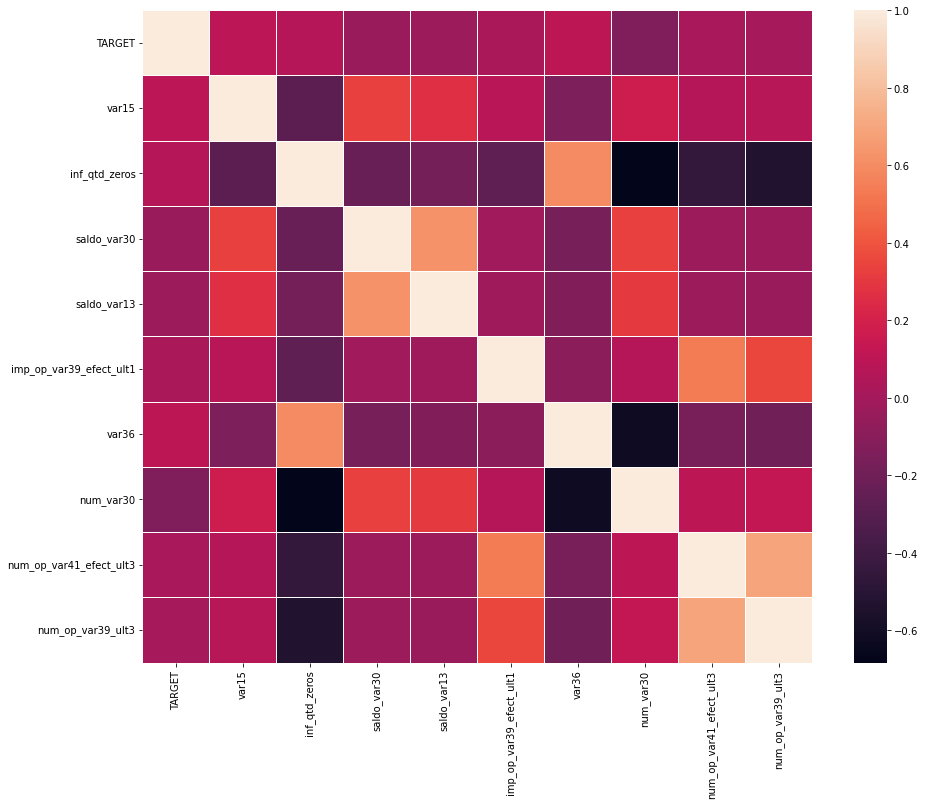

In [89]:
f, ax = plt.subplots(figsize=(15, 12))
# Heat Map
sns.heatmap(correlacao,linewidths=.5, ax=ax);

In [90]:
#0.9 para mais ou para menos indica uma correlação muito forte.
#0.7 a 0.9 positivo ou negativo indica uma correlação forte.
#0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
#0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
#0 a 0.3 positivo ou negativo indica uma correlação desprezível.



threshold = 0.1
important_corrs = (correlacao[abs(correlacao) > threshold][correlacao != 1.0]) \
    .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

unique_important_corrs = unique_important_corrs.loc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
unique_important_corrs

,attribute pair,correlation
13,"(num_op_var39_ult3, num_op_var41_efect_ult3)",0.693806
19,"(inf_qtd_zeros, num_var30)",-0.682948
26,"(saldo_var13, saldo_var30)",0.625224
16,"(num_var30, var36)",-0.623701
9,"(inf_qtd_zeros, var36)",0.594287
18,"(imp_op_var39_efect_ult1, num_op_var41_efect_ult3)",0.536960
14,"(inf_qtd_zeros, num_op_var39_ult3)",-0.532195
5,"(inf_qtd_zeros, num_op_var41_efect_ult3)",-0.458039
15,"(imp_op_var39_efect_ult1, num_op_var39_ult3)",0.355271
24,"(num_var30, saldo_var30)",0.332420


In [91]:
var_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71179 entries, 0 to 71178
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TARGET                   71179 non-null  int32  
 1   var15                    71179 non-null  float64
 2   inf_qtd_zeros            71179 non-null  float64
 3   saldo_var30              71179 non-null  float64
 4   saldo_var13              71179 non-null  float64
 5   imp_op_var39_efect_ult1  71179 non-null  float64
 6   var36                    71179 non-null  int64  
 7   num_var30                71179 non-null  int64  
 8   num_op_var41_efect_ult3  71179 non-null  int64  
 9   num_op_var39_ult3        71179 non-null  int64  
dtypes: float64(5), int32(1), int64(4)
memory usage: 5.2 MB


In [92]:
var_final.shape

(71179, 10)

In [96]:
var_final.head(10)

,TARGET,var15,inf_qtd_zeros,saldo_var30,saldo_var13,imp_op_var39_efect_ult1,var36,num_var30,num_op_var41_efect_ult3,num_op_var39_ult3
0,0,23.0,355.0,0.00,0.0,0.0,99,0,0,0
1,0,34.0,329.0,300.00,300.0,0.0,3,3,0,0
2,0,23.0,340.0,3.00,0.0,0.0,99,3,0,0
3,0,37.0,309.0,70.62,0.0,0.0,2,3,0,9
4,0,39.0,319.0,135003.00,0.0,0.0,1,3,0,0
5,0,23.0,355.0,0.00,0.0,0.0,99,0,0,0
6,0,27.0,340.0,3.00,0.0,0.0,3,3,0,0
7,0,26.0,341.0,3.00,0.0,0.0,2,3,0,0
8,0,45.0,355.0,0.00,0.0,0.0,99,0,0,0
9,0,25.0,346.0,3.00,0.0,0.0,2,3,0,0


In [97]:
var_final.to_csv('base_tratada_final.csv',index=False)